In [23]:
# %pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [24]:
data = pd.read_csv('hour.csv')

In [25]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
# Rename Columns
data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

In [28]:
data.head()

,instant,dteday,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


[Text(0.5, 1.0, 'Use of the system during weekdays and weekends')]

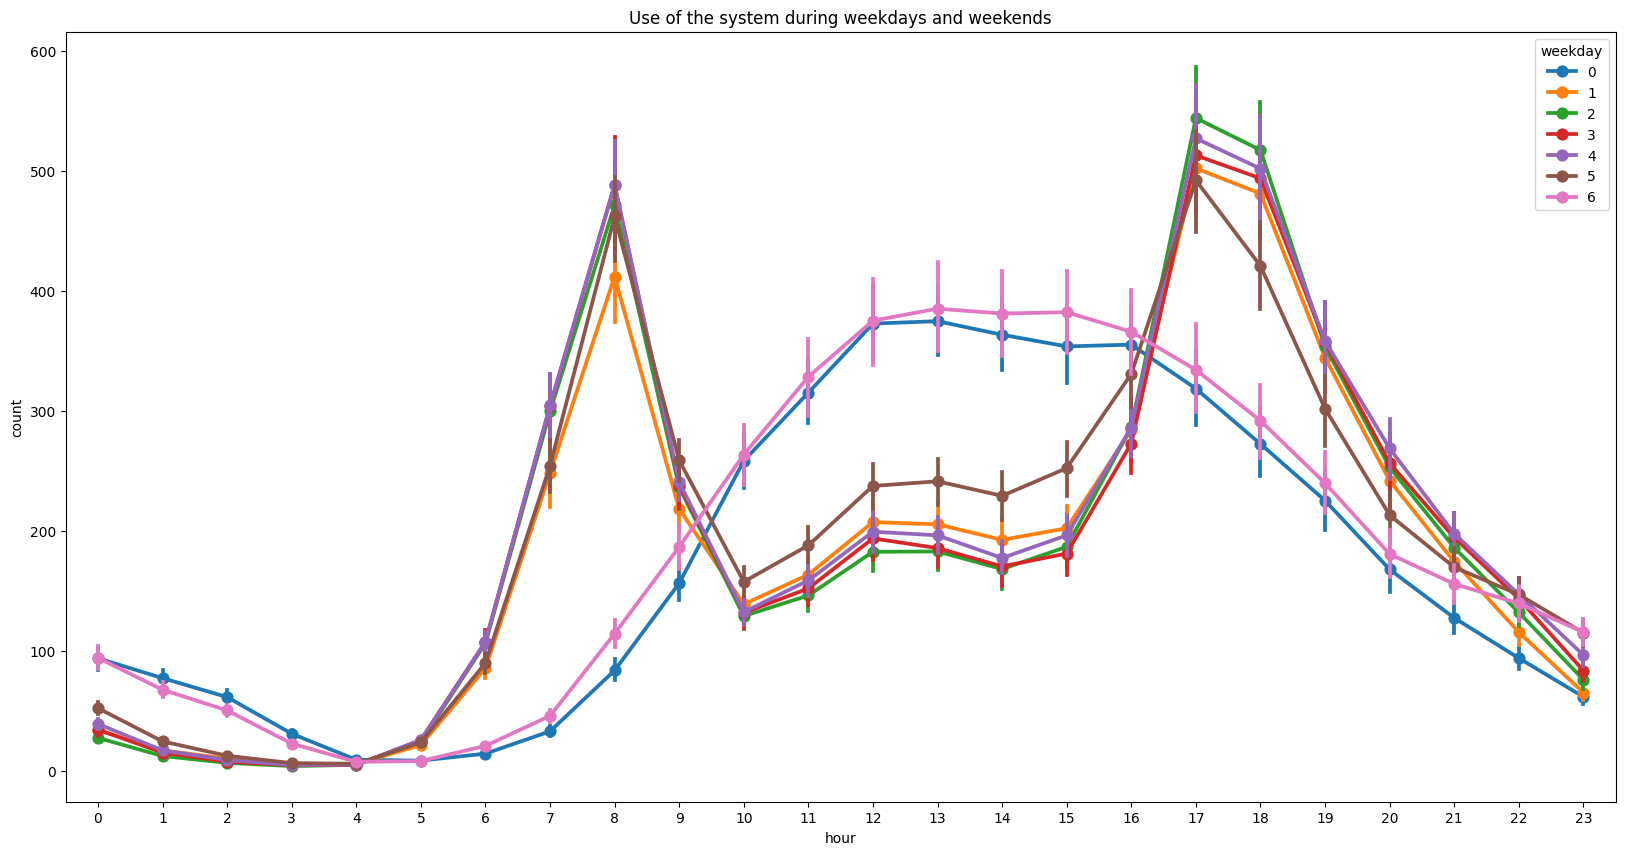

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

[Text(0.5, 1.0, 'Use of the system by casual users')]

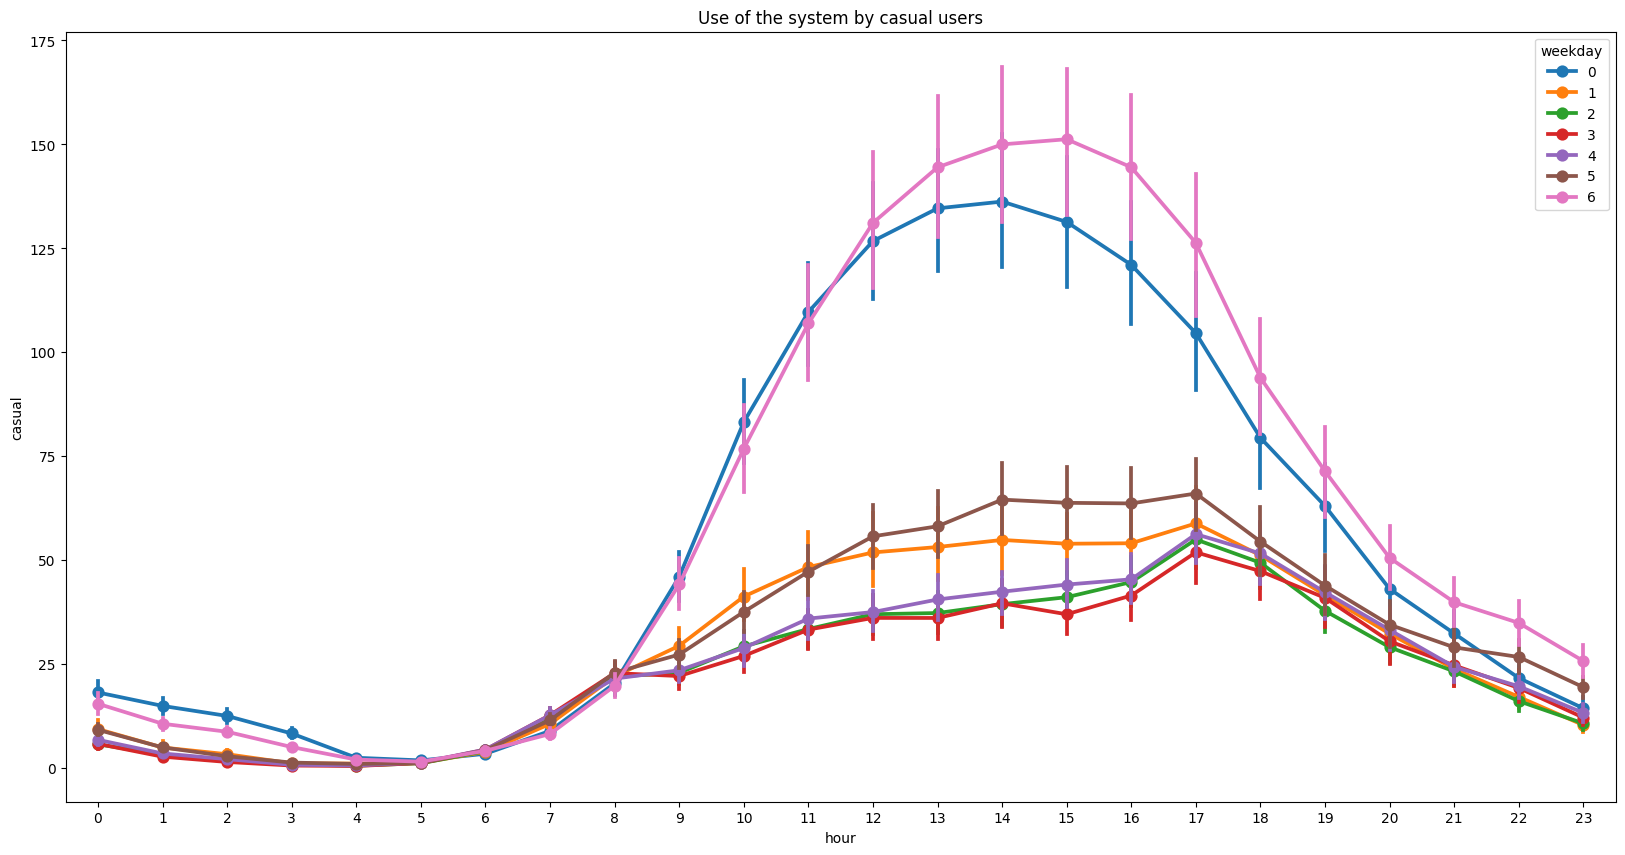

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by casual users")

[Text(0.5, 1.0, 'Use of the system by registered users')]

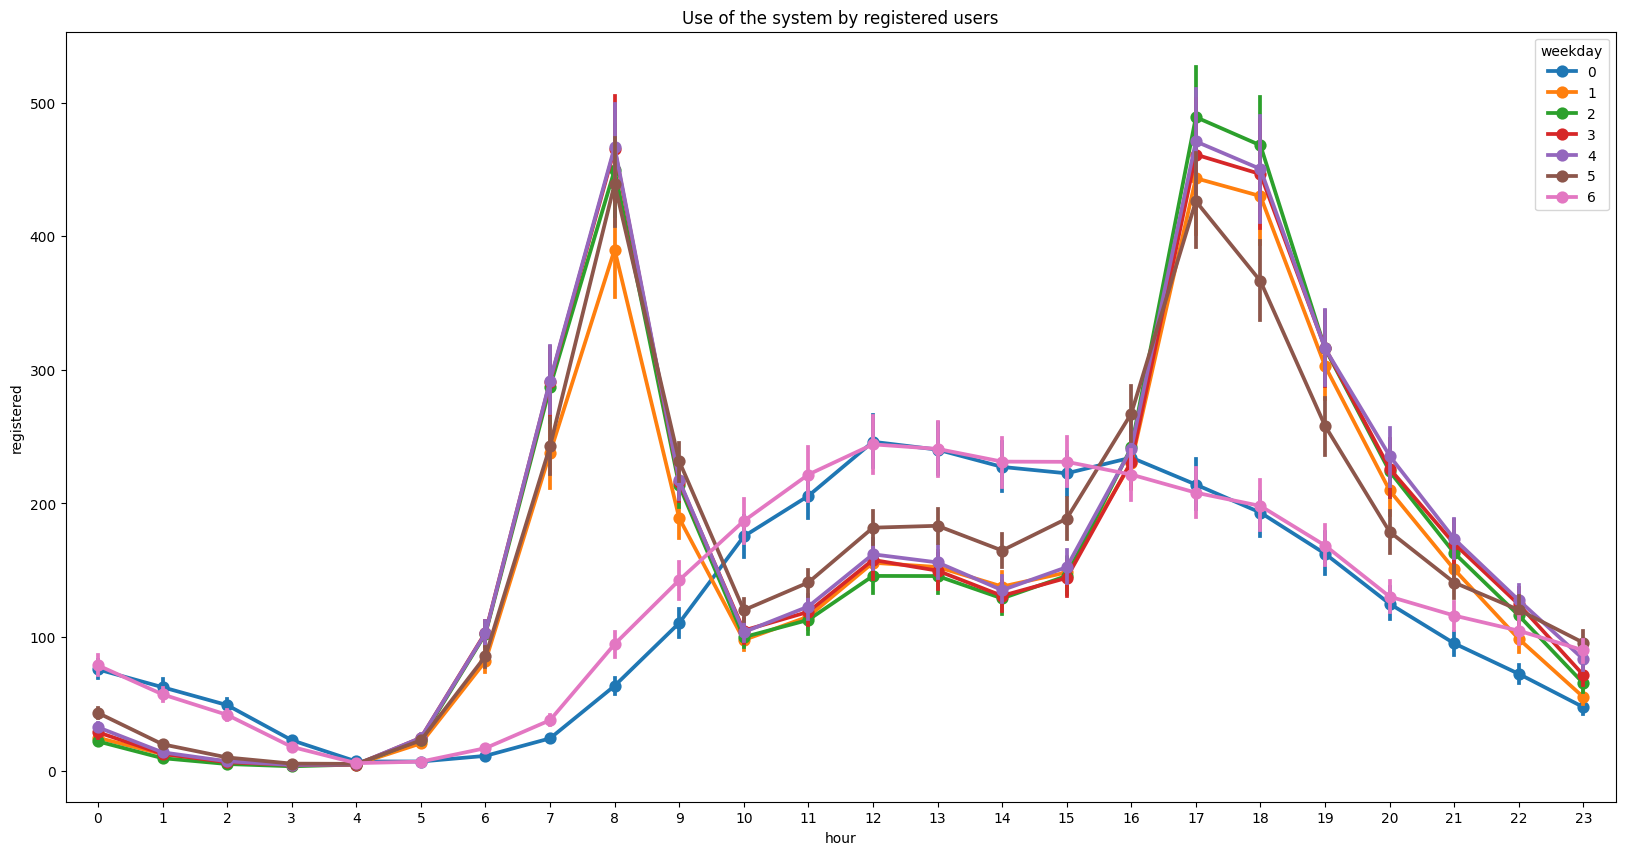

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by registered users")

[Text(0.5, 1.0, 'Use of the system: weather condition')]

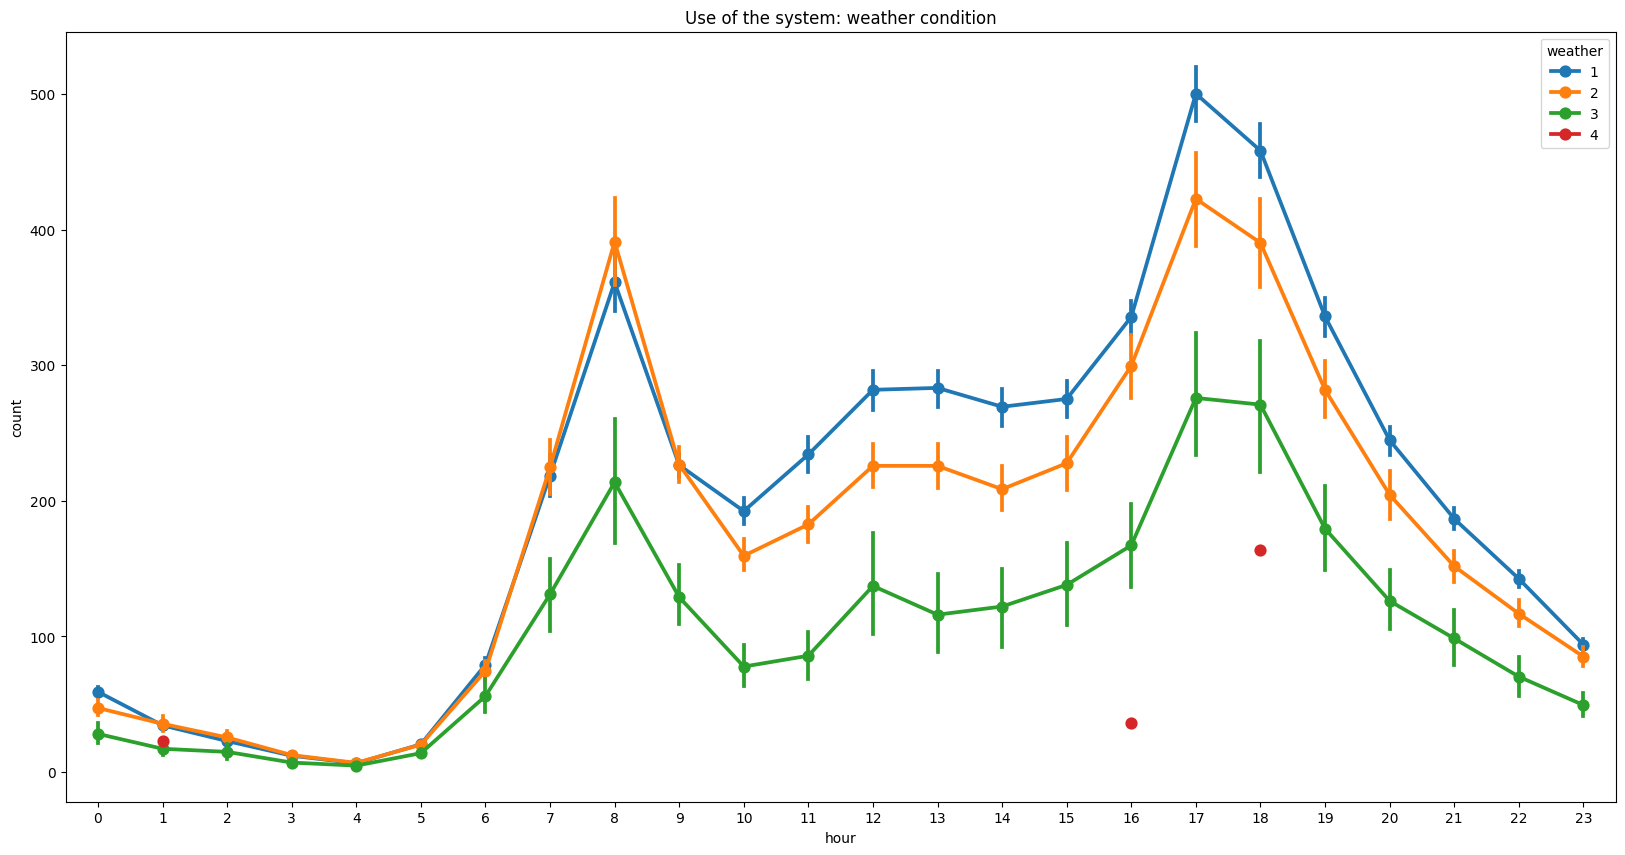

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weather']],
            x='hour', y='count',
            hue='weather', ax=ax)
ax.set(title="Use of the system: weather condition")

[Text(0.5, 1.0, 'Use of the system: season')]

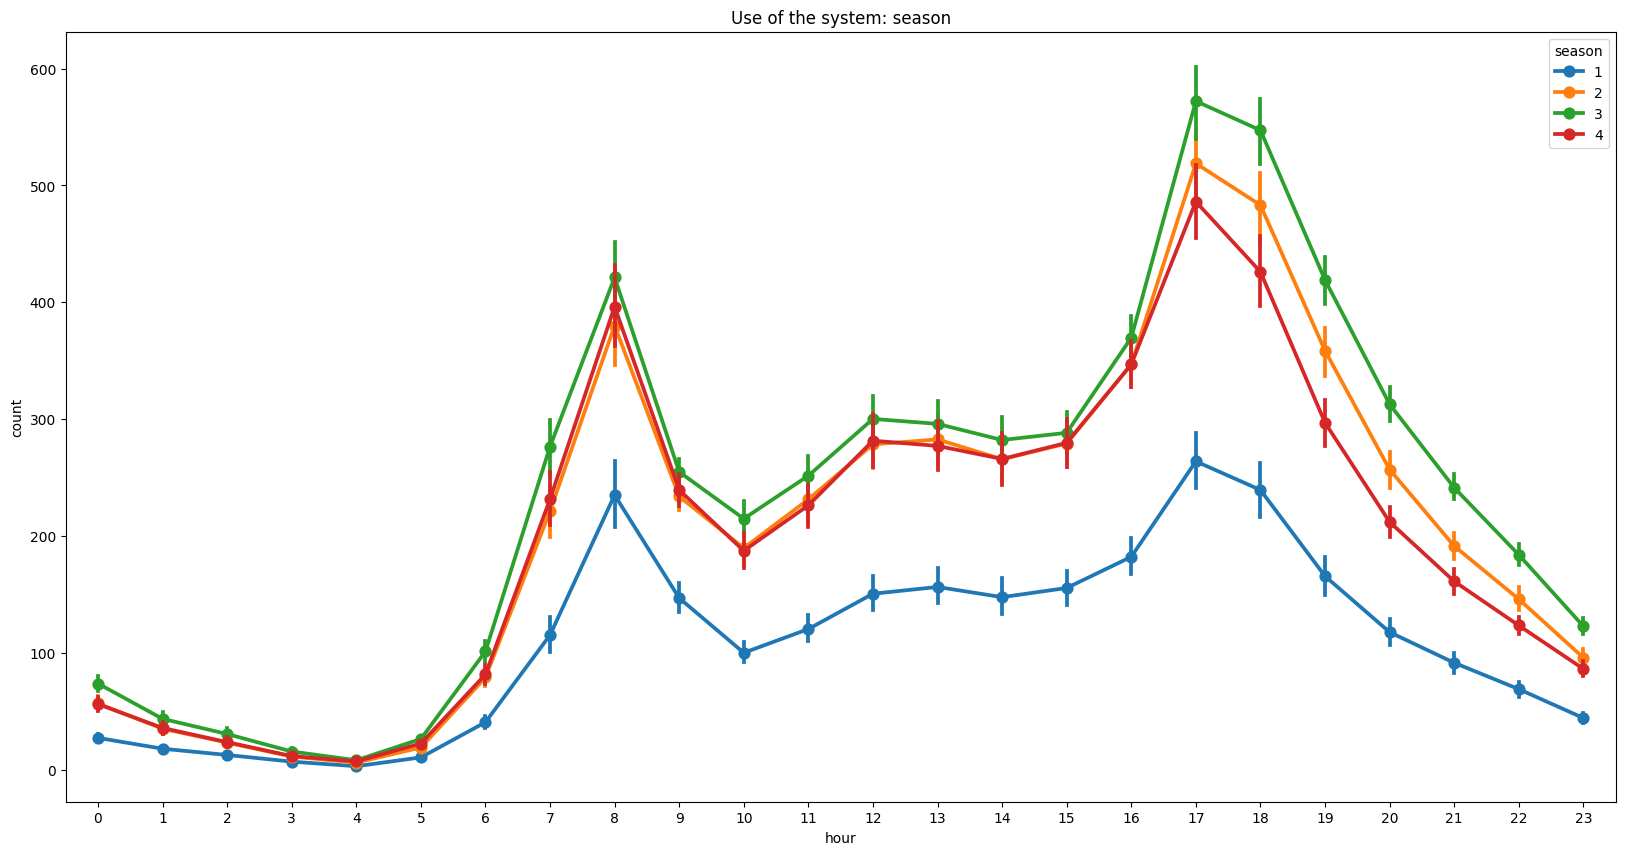

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=ax)
ax.set(title="Use of the system: season")

Text(0, 0.5, 'Count of all Biks Rented')

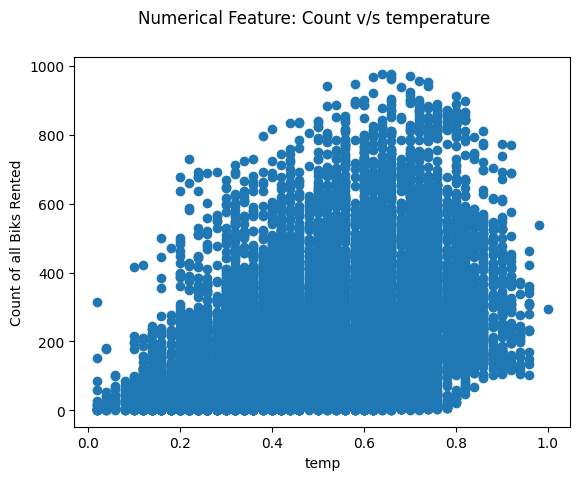

In [36]:
plt.scatter(data['temp'], data['count'])
plt.suptitle('Numerical Feature: Count v/s temperature')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

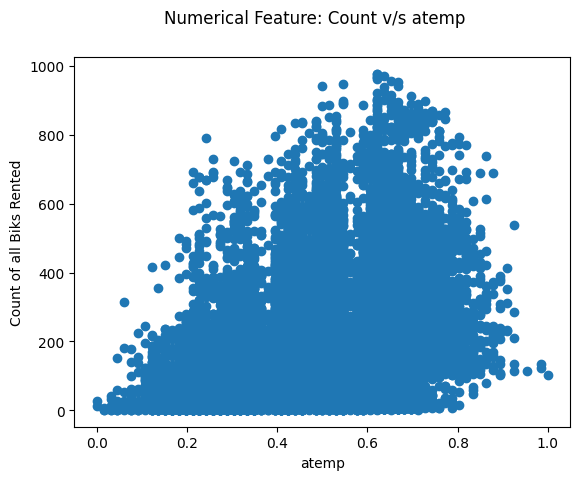

In [37]:
plt.scatter(data['atemp'], data['count'])
plt.suptitle('Numerical Feature: Count v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

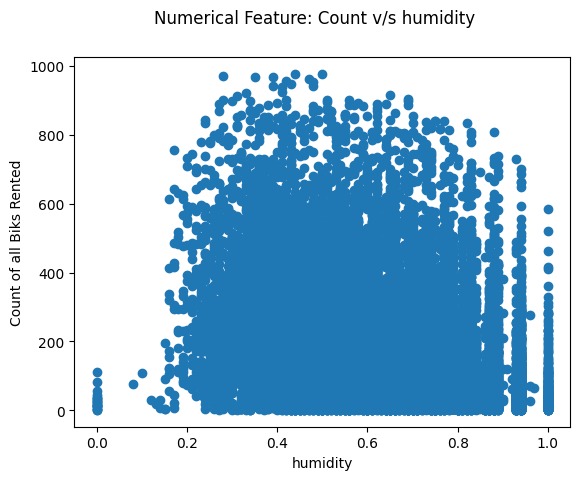

In [38]:
plt.scatter(data['humidity'], data['count'])
plt.suptitle('Numerical Feature: Count v/s humidity')
plt.xlabel('humidity')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

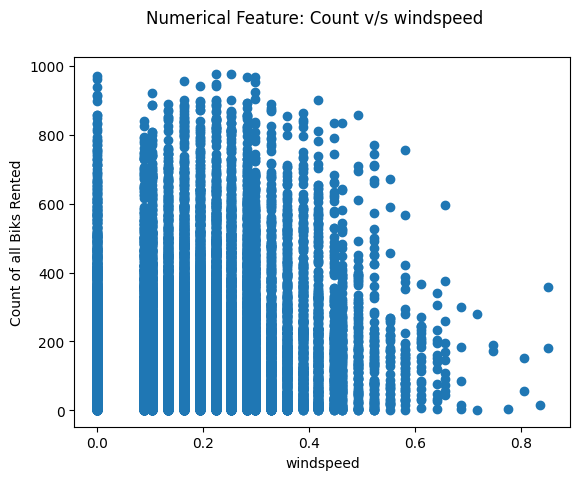

In [39]:
plt.scatter(data['windspeed'], data['count'])
plt.suptitle('Numerical Feature: Count v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

In [40]:
data = data.drop(['casual','registered'], axis=1)

In [41]:
bikes_df_model_data = data.copy()

outcome = 'count'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_train, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 139.14


In [42]:
bikes_df_model_data = data.copy()

outcome = 'count'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()

#training model in training set
DT_model.fit(X_trian, y_train)

# making predection using the test set
y_pred = DT_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 60.32


In [43]:
bikes_df_model_data = data.copy()

outcome = 'count'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 100)

#training model in training set
RF_model.fit(X_trian, y_train)

# making predection using the test set
y_pred = RF_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 41.95
